<a href="https://colab.research.google.com/github/cstecker/politicsRLab/blob/main/Wie_die_Thesenauswahl_den_Wahl_O_Mat_beeinflusst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wie die Thesenauswahl den Wahl-O-Mat beeinflusst**

## **Setup**
Zu Beginn laden wir die Pakete, die wir benötigen.

In [3]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Sodann laden wir die Daten für den Wahl-O-Mat von Hessen, den wir nutzen, um ein paar Überlegungen zu illustrieren

In [4]:
# Datensatz herunterladen
download.file("https://github.com/cstecker/politicsRLab/blob/main/data/he2023.rds?raw=true", "he2023.rds")

# Datensatz in R einbinden
he2023 <- readRDS("he2023.rds")

**Der Wahl-O-Mat für Hessen 2023**



In [5]:
glimpse(he2023)

Rows: 798
Columns: 8
$ party_no      <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 1…
$ party_short   <chr> "CDU", "GRÜNE", "SPD", "AfD", "FDP", "DIE LINKE", "FREIE…
$ party_long    <chr> "Christlich Demokratische Union Deutschlands", "BÜNDNIS …
$ these_id      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ these_title   <chr> "Wählen mit 16", "Wählen mit 16", "Wählen mit 16", "Wähl…
$ these_content <chr> "Jugendliche sollen bei Landtagswahlen ab 16 Jahren wähl…
$ party_pos     <dbl> -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, -1, 1, -1, 1…
$ party_reasons <chr> "Wir fördern eine stärkere Beteiligung junger Menschen a…


Schließlich können wir auch die oft vertraute "Excel-Perspektive" konsultieren (dazu wählen wir uns mal nur die SPD aus):

In [6]:
he2023 %>%
    filter(party_short == "SPD") %>%
    View()

party_no,party_short,party_long,these_id,these_title,these_content,party_pos,party_reasons
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
3,SPD,Sozialdemokratische Partei Deutschlands,1,Wählen mit 16,Jugendliche sollen bei Landtagswahlen ab 16 Jahren wählen dürfen.,1,"Eine Absenkung des Wahlalters auf 16 Jahre stärkt unsere Demokratie. Junge Menschen sollen bei der Gestaltung ihrer Zukunft mehr Gewicht bekommen. Wir werden die Beteiligungsmöglichkeiten junger Menschen in Hessen verbessern und nachhaltig stärken. Dabei setzen wir auf einen Methodenmix aus Landesjugendrat, Jugendkongress, digitalem Jugendportal und einer Landesfachstelle zur Jugendbeteiligung. Wir werden die verpflichtende Kinder- und Jugendbeteiligung auf kommunaler Ebene einführen."
3,SPD,Sozialdemokratische Partei Deutschlands,2,Abzug der US-Streitkräfte,Hessen soll sich für den Abzug der im Land stationierten US-Streitkräfte einsetzen.,-1,Die SPD steht für internationale Solidarität sowie Austausch und Kooperation mit unseren Bündnispartnern.
3,SPD,Sozialdemokratische Partei Deutschlands,3,Schulessen,Eltern sollen sich weiterhin an den Kosten für das Schulessen beteiligen müssen.,-1,"Wir fördern gesunde Ernährung und werden sicherstellen, dass Hessen endlich am EU-Schulobstprogramm teilnimmt. Wir streben ein kostenloses und qualitativ hochwertiges Mittagessen an unseren Schulen an. Wir werden Projekte zur Abfallvermeidung von Lebensmitteln fördern und eine bessere Vernetzung von Ernährungsräten und lokalen Projekten unterstützen."
3,SPD,Sozialdemokratische Partei Deutschlands,4,Nachtflugverbot,Das Nachtflugverbot am Frankfurter Flughafen soll ausgeweitet werden.,1,"Wir werden alle Möglichkeiten nutzen um ein Maximum an Lärmschutz für die Region zu erreichen, ohne den Standort einseitig zu benachteiligen. Dazu gehören rechtssichere Lärmobergrenzen und ein Nachtflugverbot Plus am Frankfurter Flughafen. Im Rahmen des rechtlich Möglichen soll geprüft werden, welche Flugverbindungen in den Tagzeitraum verlagert werden können, um in den Randzeiten der Lärmpausen zu entlasten. Systematische Verstöße gegen das Nachtflugverbot wollen wir stärker ahnden."
3,SPD,Sozialdemokratische Partei Deutschlands,5,Kohlekraftwerke,Die Kohlekraftwerke in Hessen sollen auch nach 2038 weiterbetrieben werden.,-1,"Die SPD Hessen steht zum Kohleausstiegsgesetz. Das Land Hessen hat seinen Beitrag zur Nachhaltigkeit, Klimaschutz und Generationengerechtigkeit zu leisten."
3,SPD,Sozialdemokratische Partei Deutschlands,6,Abschiebung,Das Land Hessen soll ausreisepflichtige Ausländerinnen und Ausländer konsequent abschieben.,1,"Ein handlungsfähiger Staat zeichnet sich auch dadurch aus, dass er Rechte durchsetzt. Das gilt auch bei Abschiebungen ausreisepflichtigen Ausländerinnen und Ausländer. Aber auch bei Abschiebungen ist Humanität Richtschnur staatlichen Handelns. Es darf nicht darum gehen, für Statistiken möglichst hohe Abschiebezahlen zu produzieren. Verbriefte Schutzrechte, bspw. Kindeswohl, müssen für alle Personenkreise gelten. Sie sind unteilbar. Wir sind gegen Abschiebungen in Krisenregionen."
3,SPD,Sozialdemokratische Partei Deutschlands,7,Ökologische Landwirtschaft,Hessen soll nur noch ökologische Landwirtschaft fördern.,-1,"Wir wollen, dass auf der gesamten Landwirtschaftsfläche nachhaltiger gewirtschaftet wird. Die notwendigen Förderprogramme wollen wir vereinfachen und entbürokratisieren. Zudem fördern wir auch weiterhin die Umstellung von Betrieben zum ökologischen Landbau. Die SPD unterstützt den Erhalt einer leistungsfähigen, den Zielen der Nachhaltigkeit und des Tierwohls verpflichteten, wettbewerbsfähigen Landwirtschaft, die auf hohem Niveau sichere Lebensmittel produziert."
3,SPD,Sozialdemokratische Partei Deutschlands,8,Verfassungsschutz abschaffen,Das Landesamt für Verfassungsschutz Hessen soll aufgelöst werden.,-1,"Die SPD steht bei allen Sicherheitsbedürfnissen immer für die Wahrung und den Schutz der Bürger*innenrechte. Wir wollen eine Reform des Verfassungsschutzes,

# Ihre eigenen Positionen zum Wahl-O-Mat in Hessen 2023

Nun geben Sie ihre Positionen zu den einzelnen Thesen ein.

In [7]:
# Creating the tibble with an self_pos column
self_pos <- tribble(
  ~`these_id`, ~`these_title`,                               ~self_pos,
  1,            "Wählen mit 16",                                "n",
  2,            "Abzug der US-Streitkräfte",                    "n",
  3,            "Schulessen",                                   "j",
  4,            "Nachtflugverbot",                              "n",
  5,            "Kohlekraftwerke",                              "j",
  6,            "Abschiebung",                                  "j",
  7,            "Ökologische Landwirtschaft",                   "n",
  8,            "Verfassungsschutz abschaffen",                 "n",
  9,            "Schuldenbremse",                               "j",
  10,           "Verpflichtendes letztes Kita-Jahr",            "j",
  11,           "Landärzte",                                    "j",
  12,           "Bürgergeld",                                   "j",
  13,           "Schiene vor Straße",                           "e",
  14,           "Ausbildungsplatzabgabe",                       "n",
  15,           "Wolf",                                         "j",
  16,           "Geschlechterneutrale Sprache",                 "n",
  17,           "Fünfprozenthürde",                             "j",
  18,           "Sozialwohnungen für Deutsche",                 "j",
  19,           "Bürgerwindparks",                              "j",
  20,           "Mehrgliedriges Schulsystem",                   "j",
  21,           "Hasskriminalität",                             "e",
  22,           "Landespflegegeld",                             "e",
  23,           "Flächenversiegelung",                          "j",
  24,           "Militärische Forschung",                       "j",
  25,           "Familienbild",                                 "j",
  26,           "Grundsteuer",                                  "e",
  27,           "Projekte gegen Rechtsextremismus",             "e",
  28,           "Frauenquote",                                  "n",
  29,           "Abgabe bei Nutzung von Grundwasser",           "e",
  30,           "Zwangsräumungen",                              "j",
  31,           "Paritätische Landeslisten",                    "n",
  32,           "Deutschtest",                                  "j",
  33,           "Strafrechtliche Verfolgung von Sitzblockaden", "j",
  34,           "Volksentscheide",                              "j",
  35,           "Tanzverbot",                                   "j",
  36,           "Entgeltfreier ÖPNV",                           "n",
  37,           "NSU-Akten",                                    "n",
  38,           "Verkaufsoffene Sonntage",                      "j"
) %>%
  # convert positions to numerical scale
  mutate(self_pos = case_when(
    self_pos == "n" ~ -1,
    self_pos == "e" ~ 0,
    self_pos == "j" ~ 1)
    )

In [8]:
comparison_data <- self_pos %>% select(these_id, self_pos) %>%
  left_join(he2023, by = "these_id") %>%
  filter(party_short %in% c("CDU", "GRÜNE", "SPD", "AfD", "FDP", "DIE LINKE", "FREIE WÄHLER"))


In [9]:
# calculate max possible distance
n_theses <- comparison_data %>%  distinct(these_id) %>% count()

# Calculate city block distance
cityblock_scores <- comparison_data %>%
  group_by(party_short) %>%
  # calcualte distance in each issue
  mutate(distance = abs(self_pos - party_pos))

cityblock_scores %>%
  group_by(party_short) %>%
  # calculate total distance and closeness
  mutate(
    total_distance = sum(distance),
    close_perc = 1 - (total_distance / (n_theses*2))) %>%
  distinct(party_short, total_distance, close_perc) %>%
  arrange(desc(close_perc))

  party_short  total_distance close_perc$n
1 CDU          15             0.8026316   
2 AfD          18             0.7631579   
3 FREIE WÄHLER 22             0.7105263   
4 FDP          26             0.6578947   
5 GRÜNE        35             0.5394737   
6 SPD          39             0.4868421   
7 DIE LINKE    59             0.2236842   

In [10]:
# add other matching algorithms and put it all in one tibble
similarity_scores <- comparison_data %>%
  group_by(party_short) %>%
  mutate(
    cityblock_distance = abs(self_pos - party_pos),
    euclidean_dist = (self_pos - party_pos)^2,
    scalar_product = self_pos * party_pos
  ) %>%
  summarise(
    total_distance = sum(cityblock_distance),
    close_perc = 1 - (total_distance / (n_theses * 2)),
    total_euclidean = sqrt(sum(euclidean_dist)),
    euclidean_perc = 1 - (total_euclidean / sqrt(n_theses * 2^2)),
    sum_scalar_product = sum(scalar_product),
    scalar_perc = sum_scalar_product / n_theses
  ) %>%
  mutate(
    hybrid_score = (close_perc + euclidean_perc + scalar_perc) / 3
  ) %>%
  arrange(desc(hybrid_score))

similarity_scores

  party_short  total_distance close_perc$n total_euclidean euclidean_perc$n
1 CDU          15             0.8026316     4.795832       0.6110067       
2 AfD          18             0.7631579     5.291503       0.5708025       
3 FREIE WÄHLER 22             0.7105263     5.830952       0.5270473       
4 FDP          26             0.6578947     6.782330       0.4498804       
5 GRÜNE        35             0.5394737     7.681146       0.3769768       
6 SPD          39             0.4868421     8.185353       0.3360802       
7 DIE LINKE    59             0.2236842    10.535654       0.1454456       
  sum_scalar_product scalar_perc$n hybrid_score$n
1  23                 0.60526316    0.67296714   
2  20                 0.52631579    0.62009205   
3  14                 0.36842105    0.53533157   
4  12                 0.31578947    0.47452154   
5   3                 0.07894737    0.33179929   
6  -1                -0.02631579    0.26553551   
7 -22                -0.57894737   -0.0699

In [11]:
# Simulation --------------------------------------------------------------

# Prompt to ChatGPT: I now want to run a simulation, where we leave out theses and recalculate the measures.
# The number of theses to be randomly left out should be eligible to change. That's great but can you change
# the code so it stores an id for the specific run and alongside all values that are calculated? Please also
# provide code for a plot that shows how close_perc varies across runs

# Function to simulate leaving out random theses and recalculating similarity measures with run IDs
run_simulation_with_id <- function(comparison_data, n_leave_out, n_repeats = 100) {
  results <- vector("list", n_repeats)

  for (i in 1:n_repeats) {
    # Sample these_id to leave out
    these_to_leave_out <- sample(unique(comparison_data$these_id), size = n_leave_out)

    # Filter out these random theses
    reduced_data <- comparison_data %>%
      filter(!these_id %in% these_to_leave_out)

    # Recalculate similarity measures
    similarity_scores <- reduced_data %>%
      group_by(party_short) %>%
      mutate(
        cityblock_distance = abs(self_pos - party_pos),
        euclidean_dist = (self_pos - party_pos)^2,
        scalar_product = self_pos * party_pos
      ) %>%
      summarise(
        total_distance = sum(cityblock_distance),
        close_perc = 1 - (total_distance / (n() * 2)),
        total_euclidean = sqrt(sum(euclidean_dist)),
        euclidean_perc = 1 - (total_euclidean / sqrt(n() * 2^2)),
        sum_scalar_product = sum(scalar_product),
        scalar_perc = sum_scalar_product / n(),
        hybrid_score = (close_perc + euclidean_perc + scalar_perc) / 3
      ) %>%
      mutate(run_id = i)  # Add a run identifier for each simulation

    results[[i]] <- similarity_scores
  }

  # Combine results from all iterations
  final_results <- bind_rows(results) %>%
    arrange(party_short, run_id)

  return(final_results)
}


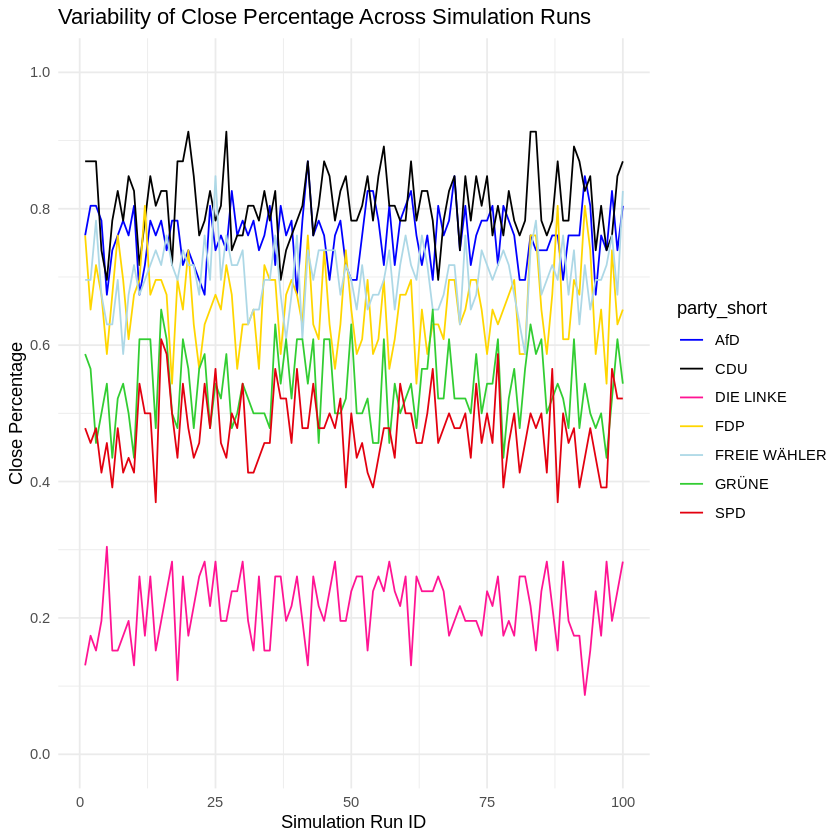

In [13]:
# Run the simulation
simulated_scores_with_id <- run_simulation_with_id(comparison_data, 15, 100)

# Plot variability --------------------------------------------------------
party_colors <- c("AfD" = "blue",
                  "GRÜNE" = "#32CD32",
                  "CDU" = "black",
                  "FDP" = "#FFD600",
                  "FREIE WÄHLER" = "lightblue",
                  "DIE LINKE" = "deeppink",
                  "SPD" = "#E3000F")



# Plot showing how close_perc varies across runs for each party
simulated_scores_with_id %>%
  ggplot(aes(x = run_id, y = close_perc, color = party_short, group = party_short)) +
  geom_line() +
  labs(title = "Variability of Close Percentage Across Simulation Runs",
       x = "Simulation Run ID",
       y = "Close Percentage") +
  scale_y_continuous(
    limits = c(0, 1),
    breaks = seq(0, 1, .2)
  ) +
  scale_color_manual(
    values = party_colors
  ) +
  theme_minimal()

Warning message:
“Removed 14 rows containing missing values (`geom_bar()`).”


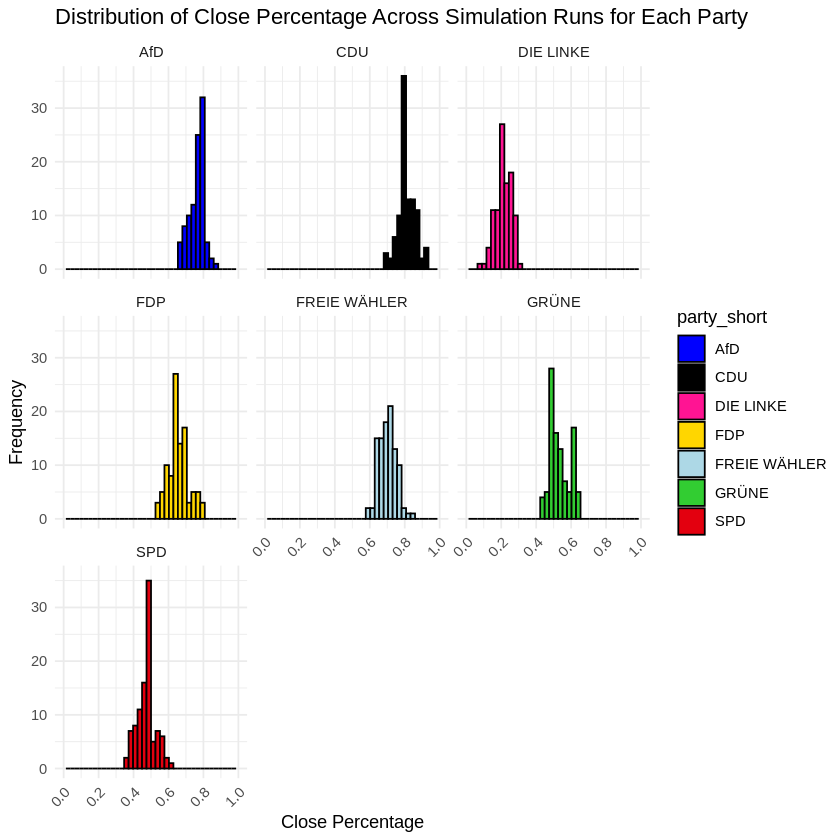

In [14]:
# histograms for each party
simulated_scores_with_id %>%
  ggplot(aes(x = close_perc, fill = party_short)) +
  geom_histogram(bins = 40, color = "black") +  # Specify the number of bins and boundary color
  facet_wrap(~ party_short, scales = "fixed") +  # Facet by party, allowing different y scales for each
  labs(title = "Distribution of Close Percentage Across Simulation Runs for Each Party",
       x = "Close Percentage",
       y = "Frequency") +
  scale_x_continuous(
    limits = c(0, 1),
    breaks = seq(0, 1, .2)
  ) +
  scale_fill_manual(values = party_colors) +  # Use the same color scheme as the line plot
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
